<a href="https://colab.research.google.com/github/ybonzou/ybonzou/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169017344/169001437 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Epoch 1/200
782/782 [==============================] - 18s 8ms/step - loss: 4.0514 - accuracy: 0.0766
Epoch 2/200
782/782 [==============================] - 6s 8ms/step - loss: 3.3697 - accuracy: 0.1865
Epoch 3/200
782/782 [==============================] - 6s 7ms/step - loss: 3.0442 - accuracy: 0.2488
Epoch 4/200
782/782 [==============================] - 6s 8ms/step - loss: 2.8184 - accuracy: 0.2948
Epoch 5/200
782/782 [==============================] - 6s 8ms/step - loss: 2.6502 - accuracy: 0.3267
Epoch 6/200
782/782 [==============================] - 6s 8ms/step - loss: 2.5150 - accuracy: 0.3539
Epoch 7/200
782/782 [==============================] - 6s 8ms/step - loss: 2.3966 - accuracy: 0.3758
Epoch 8/200
782/782 [==============================] - 6s 7ms/step - loss: 2.2946 - accuracy: 0.3970
Epoch 9/200
782/782 [==============================] - 6s 8ms/s

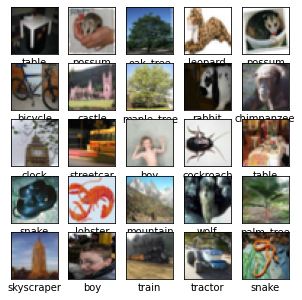

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#CIFAR100のラベル名
CIFAR100_LABELS_LIST = [
                        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
                        'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
                        'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
                        'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
                        'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
                        'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
                        'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
                        'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
                        'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                        'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
                        'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
                        'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                        'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
                        'worm'
                        ]
#CIFAR-100 datasetの読み込み
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')

train_labels_onehot=keras.utils.to_categorical(y_train,100)
test_labels_onehot=keras.utils.to_categorical(y_test,100)

#画像をfloat32(0.~1.)に変換
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#学習画像を少し見てみる
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i+25])
    plt.xlabel(CIFAR100_LABELS_LIST[int(y_train[i+25])])

#ネットワーク作成
model=keras.Sequential()

model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy',metrics=["accuracy"])

#学習用データで学習してみる
model.fit(x_train[:,:,:,:],train_labels_onehot,epochs=200,batch_size=64)

#ネットワークをファイルに保存
model_json_str=model.to_json()
open('model.json','w').write(model_json_str)
#学習したパラメータをファイルに保存
model.save_weights('weights.h5')

plt.show()